In [1]:
import pandas as pd 


In [2]:
df1 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv')
df2 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv')
# concat the two dataframes
df = pd.concat([df, df1], ignore_index=True)
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# suppress row where example_very_unclear is True
df = df[df['example_very_unclear'] == False]



In [4]:
df.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [5]:
# create a list of the columns but exclude 'text', 'id', 'author', 'subreddit', 'link_id', 'parent_id','created_utc', 'rater_id', 'example_very_unclear'
emotions = [col for col in df.columns if col not in ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id','created_utc', 'rater_id', 'example_very_unclear']]

In [6]:
emotions

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

In [7]:
# create a column for with the emotions 
df['emotions'] = df[emotions].idxmax(axis=1)

In [8]:
df.head(10)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,emotions
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,1,0,0,sadness
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,1,neutral
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,0,0,0,0,0,0,0,0,0,love
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,1,neutral
5,Right? Considering it’s such an important docu...,eespn2i,ImperialBoss,TrueReddit,t3_aizyuz,t1_eesoak0,1.548280e+09,61,False,0,...,0,0,0,0,0,0,0,0,0,gratitude
6,"He isn't as big, but he's still quite popular....",eczuekb,Rallings,cringe,t3_abeksv,t1_eczsmp8,1.546320e+09,3,False,0,...,0,0,0,0,0,0,0,0,0,disapproval
7,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,1.546536e+09,23,False,0,...,0,0,0,0,0,0,0,0,0,amusement
8,that's adorable asf,ef961hv,RedRails1917,traaaaaaannnnnnnnnns,t3_akz2ia,t3_akz2ia,1.548764e+09,73,False,0,...,0,0,0,0,0,0,0,0,0,amusement
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",edl7cr3,Tiagulus,youtubehaiku,t3_acuvb0,t1_edc21ip,1.546984e+09,54,False,0,...,0,0,0,0,0,0,0,0,0,amusement
10,"I have, and now that you mention it, I think t...",ed9w1hm,[deleted],AskMenOver30,t3_acm7f6,t1_ed9m2l0,1.546658e+09,36,False,0,...,0,0,0,0,0,0,0,0,1,neutral


In [9]:
# create a new dataframe with text and emotions
df_emo = df[['text', 'emotions']]

In [10]:
df_emo.head()

,text,emotions
0,That game hurt.,sadness
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral
5,Right? Considering it’s such an important docu...,gratitude


In [11]:
df_emo['emotions'].value_counts()

neutral           18423
admiration         5647
approval           5214
annoyance          3905
disapproval        2958
amusement          2933
gratitude          2822
curiosity          2603
anger              2552
confusion          2229
disappointment     2221
love               1806
caring             1698
optimism           1681
joy                1669
realization        1649
excitement         1473
sadness            1250
surprise           1131
disgust            1085
desire              980
fear                818
embarrassment       562
remorse             545
nervousness         310
relief              295
pride               241
grief               171
Name: emotions, dtype: int64

In [12]:
# plot with bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
# import a palette with 30 colors 
from bokeh.palettes import Category20b  

from bokeh.layouts import gridplot

output_notebook()

# create a dataframe with the emotions and the count
df_emo_count = df_emo['emotions'].value_counts().reset_index()
df_emo_count.columns = ['emotions', 'count']

# create a column source
source = ColumnDataSource(df_emo_count)

# create a figure
p = figure(x_range=df_emo_count['emotions'], plot_height=350, title="Emotions",
              toolbar_location=None, tools="")
p.vbar(x='emotions', top='count', width=0.9, source=source,
         line_color='white', fill_color=factor_cmap('emotions', palette=Category20b[20], factors=sorted(df_emo_count['emotions'].unique())))

p.xgrid.grid_line_color = None  
p.y_range.start = 0
p.y_range.end = 10000
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None
p.xaxis.axis_label = 'Emotions'
p.yaxis.axis_label = 'Count'

# create a hover tool
hover = HoverTool()
hover.tooltips = [
    ("Emotions", "@emotions"),
    ("Count", "@count"),
]
p.add_tools(hover)

show(p)


Loading BokehJS ...

In [13]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob

In [15]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment == 0:
        return 'neutral'
    else:
        return 'negative'

In [16]:
get_sentiment("I love coding in Corea")

'positive'

In [17]:
df_emo['sentiment'] = df_emo['text'].apply(get_sentiment)

C:\Users\MYRA-L~1\AppData\Local\Temp/ipykernel_23372/58986690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emo['sentiment'] = df_emo['text'].apply(get_sentiment)


In [18]:
df_emo.head()

,text,emotions,sentiment
0,That game hurt.,sadness,negative
2,"You do right, if you don't care then fuck 'em!",neutral,negative
3,Man I love reddit.,love,positive
4,"[NAME] was nowhere near them, he was by the Fa...",neutral,positive
5,Right? Considering it’s such an important docu...,gratitude,positive


In [19]:
# emotion vs sentiment 
df_emo_count = df_emo.groupby(['emotions', 'sentiment']).size()
df_emo_count

emotions    sentiment
admiration  negative      415
            neutral       601
            positive     4631
amusement   negative      368
            neutral       306
                         ... 
sadness     neutral       298
            positive      255
surprise    negative      278
            neutral       369
            positive      484
Length: 84, dtype: int64

c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\Myra-Louise\anaconda3_1\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'sadness'),
  Text(1, 0, 'neutral'),
  Text(2, 0, 'love'),
  Text(3, 0, 'gratitude'),
  Text(4, 0, 'disapproval'),
  Text(5, 0, 'amusement'),
  Text(6, 0, 'disappointment'),
  Text(7, 0, 'admiration'),
  Text(8, 0, 'realization'),
  Text(9, 0, 'annoyance'),
  Text(10, 0, 'confusion'),
  Text(11, 0, 'optimism'),
  Text(12, 0, 'curiosity'),
  Text(13, 0, 'excitement'),
  Text(14, 0, 'caring'),
  Text(15, 0, 'disgust'),
  Text(16, 0, 'remorse'),
  Text(17, 0, 'joy'),
  Text(18, 0, 'approval'),
  Text(19, 0, 'embarrassment'),
  Text(20, 0, 'surprise'),
  Text(21, 0, 'anger'),
  Text(22, 0, 'grief'),
  Text(23, 0, 'pride'),
  Text(24, 0, 'desire'),
  Text(25, 0, 'relief'),
  Text(26, 0, 'fear'),
  Text(27, 0, 'nervousness')])

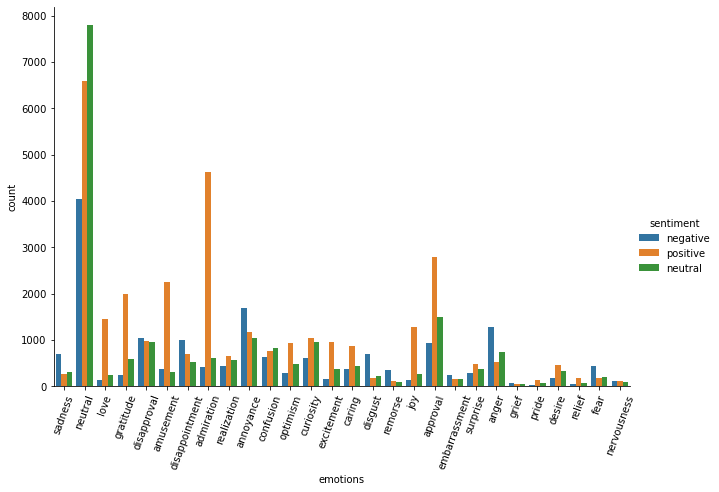

In [20]:
# import seaborn
import seaborn as sns

# factorplot and catplot weidth is big 

# create a factorplot
sns.factorplot(x='emotions', hue='sentiment', data=df_emo, kind='count', size=6, aspect=1.5)
# axis labels rotation
import matplotlib.pyplot as plt
plt.xticks(rotation=70)




cleaning 

In [21]:
import neattext as nfx


In [22]:
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [23]:
import nltk

In [24]:
# using nltk functions clean the df_emo
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_stopwords)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_punctuations)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_special_characters)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_html_tags)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_urls)
df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_emojis)




C:\Users\MYRA-L~1\AppData\Local\Temp/ipykernel_23372/3733783313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_stopwords)
C:\Users\MYRA-L~1\AppData\Local\Temp/ipykernel_23372/3733783313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emo['text_cleaned'] = df_emo['text'].apply(nfx.remove_punctuations)
C:\Users\MYRA-L~1\AppData\Local\Temp/ipykernel_23372/3733783313.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [25]:
# keep df with clean text
df_emo_clean = df_emo[['text_cleaned', 'emotions']]

In [26]:
# load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, plot_confusion_matrix

In [27]:
# split the dataset 
from sklearn.model_selection import train_test_split


# build features from our text 

In [28]:
X = df_emo_clean['text_cleaned']
y = df_emo_clean['emotions']

In [29]:
# vectorize the text
cv = CountVectorizer()
X = cv.fit_transform(X)

In [30]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# build the model 
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [32]:
# accuracy score
# methode 1 
print("Accuracy Score: ", nv_model.score(X_test, y_test))

Accuracy Score:  0.31353901996370237


In [33]:
y_pred_vn = nv_model.predict(X_test)

In [ ]:
 # make a single prediction 
# vectorize the text
# applied the model

In [34]:
example = ["I love coding in Corea"]
example = cv.transform(example).toarray()
nv_model.predict(example)


array(['love'], dtype='<U14')